## Renaming the images and save to new dir

In [7]:
import numpy as np
import pandas as pd
import matplotlib as plt

import os
dic = {'category 1':'new_category_1','category 2':'new_category_2','category 3':'new_category_3','category 4':'new_category_4'}
m = 1
for new_dir,cat_fold in dic.items():
    if not os.path.isdir(cat_fold):
        os.mkdir(cat_fold)

    fidget_folders = [folder for folder in os.listdir('.') if new_dir in folder]

    n = 0
    for folder in fidget_folders:
        for imfile in os.scandir(folder):
            sav = 'cat'+str(m)+'.'
            os.rename(imfile.path, os.path.join(cat_fold,  '{}{:0}.jpeg'.format(sav,n)))
            n += 1
    m += 1

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

## Image in the dataset is low, inorder improve efficency of the model -->> Image generation is required

In [5]:
import os
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
os.chdir('/Users/ASK Computers/Desktop/Datamites/Image/Input/Dataset/train/')
n = 0
m = 1
t = [1,2,3,4]
l=0
for x in t:
    image_dir = 'new_category_'+ str(x) +'/'

    for new_imfile in os.scandir(image_dir):

        sav = 'cat'+str(m)+'.'
        img = load_img(os.path.join(image_dir, '{}{:0}.jpeg'.format(sav,n))) 
        n += 1
        x = img_to_array(img)  
        x = x.reshape((1,) + x.shape)  

        
        i = 0
        
        for batch in datagen.flow(x, batch_size=1,save_to_dir='cat'+ str(m), save_prefix='cat'+str(m)+'.', save_format='jpeg'):
            i += 1
            l += 1
            if i > 10:
                break  # otherwise the generator would loop indefinitely
    n = 0
    m += 1
    l = 0

## convert this dataset to training data -->>all of the images are same size (training size)

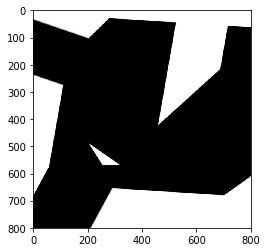

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
# os.chdir('/Users/ASK Computers/Desktop/Datamites/Image/Input/Dataset/train/')
DATADIR = "/Users/ASK Computers/Desktop/Datamites/Image/Input/Dataset/train"

CATEGORIES = ["cat1", "Cat2","cat3","cat4"]
for category in CATEGORIES:  
    path = os.path.join(DATADIR,category)  
    for img in os.listdir(path):  
        img_array = cv2.imread(os.path.join(path,img) ,cv2.THRESH_BINARY)  
        plt.imshow(img_array, cmap='gray')  
        plt.show()  
        break  
    break

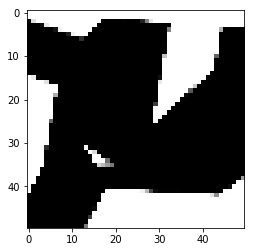

In [3]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()



In [5]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category)  
        class_num = CATEGORIES.index(category) 

        for img in tqdm(os.listdir(path)):  
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  
                training_data.append([new_array, class_num])  
            except Exception as e:  
                pass
           

create_training_data()

print(len(training_data))

100%|██████████| 1211/1211 [00:12<00:00, 100.51it/s]


4516


## shuffle is required for training set -->> because it will order ..// it may increase validation accuracy

In [105]:
import random

random.shuffle(training_data)

In [10]:
for sample in training_data[:10]:
    print(sample[1])

1
3
3
3
2
3
2
2
2
2


In [8]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[  0]
   [  0]
   [  1]
   ...
   [255]
   [255]
   [255]]

  [[  4]
   [  1]
   [  0]
   ...
   [255]
   [255]
   [255]]

  [[254]
   [254]
   [ 44]
   ...
   [255]
   [255]
   [255]]

  ...

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]]]


In [15]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

## To split training set to train and test

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.5, random_state=10)

In [19]:
X_train[0].shape

(50, 50, 1)

In [23]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_train[0]

Using TensorFlow backend.


array([0., 0., 1., 0.], dtype=float32)

In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D


#create model
model = Sequential()

#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(50,50,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(4, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=10)

Train on 2258 samples, validate on 2258 samples
Epoch 1/10
2258/2258 [==============================] - ETA: 1:17 - loss: 1.4121 - acc: 0.187 - ETA: 56s - loss: 2.6788 - acc: 0.218 - ETA: 48s - loss: 2.4995 - acc: 0.28 - ETA: 44s - loss: 2.1862 - acc: 0.28 - ETA: 42s - loss: 2.0398 - acc: 0.27 - ETA: 40s - loss: 1.9399 - acc: 0.27 - ETA: 38s - loss: 1.8654 - acc: 0.26 - ETA: 37s - loss: 1.8020 - acc: 0.26 - ETA: 36s - loss: 1.7598 - acc: 0.25 - ETA: 35s - loss: 1.7241 - acc: 0.25 - ETA: 34s - loss: 1.6919 - acc: 0.26 - ETA: 33s - loss: 1.6634 - acc: 0.27 - ETA: 33s - loss: 1.6379 - acc: 0.29 - ETA: 32s - loss: 1.6170 - acc: 0.30 - ETA: 31s - loss: 1.5965 - acc: 0.32 - ETA: 30s - loss: 1.5759 - acc: 0.34 - ETA: 30s - loss: 1.5566 - acc: 0.36 - ETA: 29s - loss: 1.5378 - acc: 0.37 - ETA: 28s - loss: 1.5188 - acc: 0.37 - ETA: 28s - loss: 1.4967 - acc: 0.38 - ETA: 27s - loss: 1.4836 - acc: 0.38 - ETA: 26s - loss: 1.4603 - acc: 0.39 - ETA: 26s - loss: 1.4404 - acc: 0.40 - ETA: 25s - loss: 1.

2258/2258 [==============================] - ETA: 37s - loss: 0.1227 - acc: 0.96 - ETA: 37s - loss: 0.1319 - acc: 0.98 - ETA: 36s - loss: 0.1461 - acc: 0.96 - ETA: 35s - loss: 0.1708 - acc: 0.95 - ETA: 34s - loss: 0.1767 - acc: 0.95 - ETA: 34s - loss: 0.1840 - acc: 0.94 - ETA: 34s - loss: 0.1875 - acc: 0.94 - ETA: 33s - loss: 0.1852 - acc: 0.94 - ETA: 32s - loss: 0.1960 - acc: 0.94 - ETA: 32s - loss: 0.1993 - acc: 0.94 - ETA: 31s - loss: 0.2020 - acc: 0.93 - ETA: 31s - loss: 0.1969 - acc: 0.94 - ETA: 30s - loss: 0.1915 - acc: 0.94 - ETA: 29s - loss: 0.1927 - acc: 0.94 - ETA: 29s - loss: 0.1962 - acc: 0.93 - ETA: 28s - loss: 0.1912 - acc: 0.94 - ETA: 28s - loss: 0.1878 - acc: 0.94 - ETA: 27s - loss: 0.1858 - acc: 0.94 - ETA: 27s - loss: 0.1891 - acc: 0.94 - ETA: 26s - loss: 0.1857 - acc: 0.94 - ETA: 26s - loss: 0.1826 - acc: 0.94 - ETA: 25s - loss: 0.1846 - acc: 0.94 - ETA: 25s - loss: 0.1832 - acc: 0.94 - ETA: 24s - loss: 0.1815 - acc: 0.95 - ETA: 24s - loss: 0.1811 - acc: 0.95 - ETA: 

2258/2258 [==============================] - ETA: 35s - loss: 0.0623 - acc: 1.00 - ETA: 35s - loss: 0.0766 - acc: 1.00 - ETA: 35s - loss: 0.0597 - acc: 1.00 - ETA: 34s - loss: 0.0509 - acc: 1.00 - ETA: 34s - loss: 0.0487 - acc: 1.00 - ETA: 33s - loss: 0.0465 - acc: 1.00 - ETA: 33s - loss: 0.0575 - acc: 0.99 - ETA: 32s - loss: 0.0563 - acc: 0.99 - ETA: 32s - loss: 0.0652 - acc: 0.98 - ETA: 31s - loss: 0.0615 - acc: 0.99 - ETA: 31s - loss: 0.0571 - acc: 0.99 - ETA: 32s - loss: 0.0556 - acc: 0.99 - ETA: 32s - loss: 0.0539 - acc: 0.99 - ETA: 32s - loss: 0.0597 - acc: 0.98 - ETA: 31s - loss: 0.0604 - acc: 0.98 - ETA: 31s - loss: 0.0596 - acc: 0.98 - ETA: 30s - loss: 0.0585 - acc: 0.98 - ETA: 30s - loss: 0.0570 - acc: 0.98 - ETA: 30s - loss: 0.0573 - acc: 0.99 - ETA: 30s - loss: 0.0559 - acc: 0.99 - ETA: 29s - loss: 0.0547 - acc: 0.99 - ETA: 29s - loss: 0.0554 - acc: 0.99 - ETA: 28s - loss: 0.0543 - acc: 0.99 - ETA: 28s - loss: 0.0544 - acc: 0.99 - ETA: 27s - loss: 0.0530 - acc: 0.99 - ETA: 

2258/2258 [==============================] - ETA: 37s - loss: 0.0169 - acc: 1.00 - ETA: 36s - loss: 0.0106 - acc: 1.00 - ETA: 37s - loss: 0.0118 - acc: 1.00 - ETA: 36s - loss: 0.0114 - acc: 1.00 - ETA: 35s - loss: 0.0118 - acc: 1.00 - ETA: 34s - loss: 0.0112 - acc: 1.00 - ETA: 34s - loss: 0.0118 - acc: 1.00 - ETA: 35s - loss: 0.0114 - acc: 1.00 - ETA: 34s - loss: 0.0117 - acc: 1.00 - ETA: 33s - loss: 0.0113 - acc: 1.00 - ETA: 32s - loss: 0.0129 - acc: 1.00 - ETA: 32s - loss: 0.0138 - acc: 1.00 - ETA: 32s - loss: 0.0137 - acc: 1.00 - ETA: 32s - loss: 0.0130 - acc: 1.00 - ETA: 31s - loss: 0.0130 - acc: 1.00 - ETA: 31s - loss: 0.0125 - acc: 1.00 - ETA: 31s - loss: 0.0131 - acc: 1.00 - ETA: 31s - loss: 0.0139 - acc: 0.99 - ETA: 30s - loss: 0.0141 - acc: 0.99 - ETA: 30s - loss: 0.0146 - acc: 0.99 - ETA: 29s - loss: 0.0141 - acc: 0.99 - ETA: 28s - loss: 0.0137 - acc: 0.99 - ETA: 28s - loss: 0.0133 - acc: 0.99 - ETA: 27s - loss: 0.0136 - acc: 0.99 - ETA: 27s - loss: 0.0133 - acc: 0.99 - ETA: 

2258/2258 [==============================] - ETA: 35s - loss: 0.0018 - acc: 1.00 - ETA: 36s - loss: 0.0026 - acc: 1.00 - ETA: 40s - loss: 0.0025 - acc: 1.00 - ETA: 39s - loss: 0.0026 - acc: 1.00 - ETA: 38s - loss: 0.0026 - acc: 1.00 - ETA: 37s - loss: 0.0028 - acc: 1.00 - ETA: 38s - loss: 0.0027 - acc: 1.00 - ETA: 38s - loss: 0.0027 - acc: 1.00 - ETA: 36s - loss: 0.0026 - acc: 1.00 - ETA: 35s - loss: 0.0031 - acc: 1.00 - ETA: 34s - loss: 0.0029 - acc: 1.00 - ETA: 33s - loss: 0.0028 - acc: 1.00 - ETA: 32s - loss: 0.0029 - acc: 1.00 - ETA: 32s - loss: 0.0035 - acc: 1.00 - ETA: 31s - loss: 0.0035 - acc: 1.00 - ETA: 30s - loss: 0.0033 - acc: 1.00 - ETA: 31s - loss: 0.0032 - acc: 1.00 - ETA: 30s - loss: 0.0032 - acc: 1.00 - ETA: 29s - loss: 0.0030 - acc: 1.00 - ETA: 29s - loss: 0.0029 - acc: 1.00 - ETA: 29s - loss: 0.0030 - acc: 1.00 - ETA: 28s - loss: 0.0029 - acc: 1.00 - ETA: 28s - loss: 0.0030 - acc: 1.00 - ETA: 27s - loss: 0.0029 - acc: 1.00 - ETA: 27s - loss: 0.0028 - acc: 1.00 - ETA: 

### I got accuracy of 1 and validationaccuracy of 86

In [103]:
model.predict(X_test[:10])

array([[9.58280452e-07, 3.44969146e-02, 9.65461254e-01, 4.08112865e-05],
       [5.39841354e-01, 2.01167604e-05, 9.92571339e-02, 3.60881418e-01],
       [1.75101877e-17, 3.08057497e-04, 4.95847641e-03, 9.94733453e-01],
       [6.58263758e-22, 9.88645570e-06, 6.27605884e-11, 9.99990106e-01],
       [1.65278871e-23, 9.30569541e-08, 1.65773506e-09, 9.99999881e-01],
       [1.14082734e-13, 9.99994993e-01, 1.79963365e-06, 3.20218419e-06],
       [9.97005403e-01, 2.01490579e-07, 2.99436948e-03, 3.36895761e-10],
       [1.18894120e-19, 2.27805397e-09, 1.27915512e-09, 1.00000000e+00],
       [9.22241807e-01, 4.10933287e-09, 7.77582526e-02, 1.77138346e-10],
       [5.13802995e-21, 9.99999881e-01, 9.76684191e-08, 1.46023424e-08]],
      dtype=float32)

In [104]:
y_test[:10]

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)

## To test the given test dataset -->resize to normalize data size

In [91]:
path = 'test'
test= []
for img in tqdm(os.listdir(path)):  

    img_array = cv2.imread(os.path.join(path,img) ,cv2.THRESH_BINARY)  
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  
    test.append(new_array)

test  = np.array(test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

100%|██████████| 31/31 [00:02<00:00, 15.11it/s]


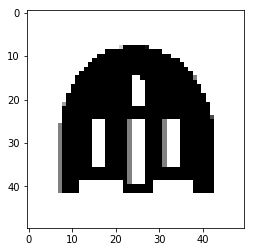

In [92]:
plt.imshow(new_array, cmap='gray')
plt.show()

In [33]:
test = []
test.append(new_array)
print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))



[[[[0.        ]
   [0.        ]
   [0.00392157]
   ...
   [1.        ]
   [1.        ]
   [1.        ]]

  [[0.01568627]
   [0.00392157]
   [0.        ]
   ...
   [1.        ]
   [1.        ]
   [1.        ]]

  [[0.99607843]
   [0.99607843]
   [0.17254902]
   ...
   [1.        ]
   [1.        ]
   [1.        ]]

  ...

  [[1.        ]
   [1.        ]
   [1.        ]
   ...
   [1.        ]
   [1.        ]
   [1.        ]]

  [[1.        ]
   [1.        ]
   [1.        ]
   ...
   [1.        ]
   [1.        ]
   [1.        ]]

  [[1.        ]
   [1.        ]
   [1.        ]
   ...
   [1.        ]
   [1.        ]
   [1.        ]]]]


## prediction for 31 images in test dataset (which is given)

In [93]:
pred = model.predict(test[:31],verbose=1)
pred

31/31 [==============================] - 0s 9ms/step


array([[1.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00],
       [0.000000e+00, 1.000000e+00, 0.000000e+00, 0.000000e+00],
       [0.000000e+00, 0.000000e+00, 0.000000e+00, 1.000000e+00],
       [0.000000e+00, 0.000000e+00, 0.000000e+00, 1.000000e+00],
       [0.000000e+00, 0.000000e+00, 1.000000e+00, 0.000000e+00],
       [0.000000e+00, 0.000000e+00, 1.000000e+00, 0.000000e+00],
       [0.000000e+00, 1.000000e+00, 0.000000e+00, 0.000000e+00],
       [0.000000e+00, 0.000000e+00, 0.000000e+00, 1.000000e+00],
       [0.000000e+00, 1.000000e+00, 0.000000e+00, 0.000000e+00],
       [0.000000e+00, 1.000000e+00, 0.000000e+00, 0.000000e+00],
       [0.000000e+00, 1.000000e+00, 0.000000e+00, 0.000000e+00],
       [0.000000e+00, 1.000000e+00, 0.000000e+00, 0.000000e+00],
       [0.000000e+00, 1.000000e+00, 0.000000e+00, 0.000000e+00],
       [0.000000e+00, 1.000000e+00, 0.000000e+00, 0.000000e+00],
       [0.000000e+00, 0.000000e+00, 0.000000e+00, 1.000000e+00],
       [0.000000e+00, 1.0

## visualize the result in proper format

In [94]:
pp = []

output = ['category 1','category 2','category 3','category 4']
num =0
for cat in pred:
    if cat[[0]]>num:
        pp.append('category 1')
    elif cat[[1]]>num:
        pp.append('category 2')
    elif cat[[2]]>num:
        pp.append('category 3')
    elif cat[[3]]>num:
        pp.append('category 4')
        
    
    

In [95]:
pp

['category 1',
 'category 2',
 'category 4',
 'category 4',
 'category 3',
 'category 3',
 'category 2',
 'category 4',
 'category 2',
 'category 2',
 'category 2',
 'category 2',
 'category 2',
 'category 2',
 'category 4',
 'category 2',
 'category 2',
 'category 3',
 'category 3',
 'category 2',
 'category 3',
 'category 3',
 'category 2',
 'category 2',
 'category 4',
 'category 2',
 'category 1',
 'category 3',
 'category 2',
 'category 3',
 'category 3']

## convert results into csv file format 

In [101]:
import pandas as pd
from pandas import DataFrame

path = 'test/'
#for i in path:
files = []
# r=root, d=directories, f = files
for r, d,f in os.walk(path):
    for file in f:
        if '.jpeg' in file:
            files.append(os.path.join(r, file)) 
# for f in files:
#     print(f)
act = ['category 1',
 'category 3',
 'category 4',
 'category 4',
 'category 3',
 'category 3',
 'category 2',
 'category 4',
 'category 2',
 'category 2',
 'category 2',
 'category 2',
 'category 2',
 'category 2',
 'category 4',
 'category 3',
 'category 3',
 'category 1',
 'category 3',
 'category 3',
 'category 3',
 'category 3',
 'category 2',
 'category 1',
 'category 4',
 'category 2',
 'category 1',
 'category 1',
 'category 3',
 'category 1',
 'category 3']
            
test_images = model.predict(test)
df = pd.DataFrame({
    'filename/image_id':files,
    'actual':act,
    'prediction':pp,
    
})

df.head(31)

,filename/image_id,actual,prediction
0,test/01.jpeg,category 1,category 1
1,test/02.jpeg,category 3,category 2
2,test/03.jpeg,category 4,category 4
3,test/04.jpeg,category 4,category 4
4,test/05.jpeg,category 3,category 3
5,test/06.jpeg,category 3,category 3
6,test/07.jpeg,category 2,category 2
7,test/08.jpeg,category 4,category 4
8,test/09.jpeg,category 2,category 2
9,test/10.jpeg,category 2,category 2


In [102]:
df.to_csv('result.csv')